In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [163]:
df=pd.read_excel(r'C:\Users\Abcom\Documents\Data Science Project\Airline Price\Data.xlsx')

In [164]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [165]:
# Checking for columns in the Dataframe
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [166]:
# Checking for Null entries
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [167]:
#dropping the records with Null values
df.dropna(inplace=True)

In [168]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [169]:
# Checking for duplicate records
df.duplicated().sum()

220

In [170]:
# There are 220 duplicate records

In [171]:
df.shape

(10682, 11)

In [172]:
# Dropping duplicated records

In [173]:
df.drop_duplicates(keep='first',inplace = True,)

In [174]:
df.shape

(10462, 11)

In [175]:
df.duplicated().sum()

0

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [177]:
# There are 10 columns out of which only 1 is numerical

In [178]:
# Checking unique values of Airlines

In [179]:
len(df['Airline'].unique())

12

In [180]:
# There are 12 unique Airlines in the dataset

In [181]:
# plotting category plot to visualise Airlinewise Prices of Flight Tickets

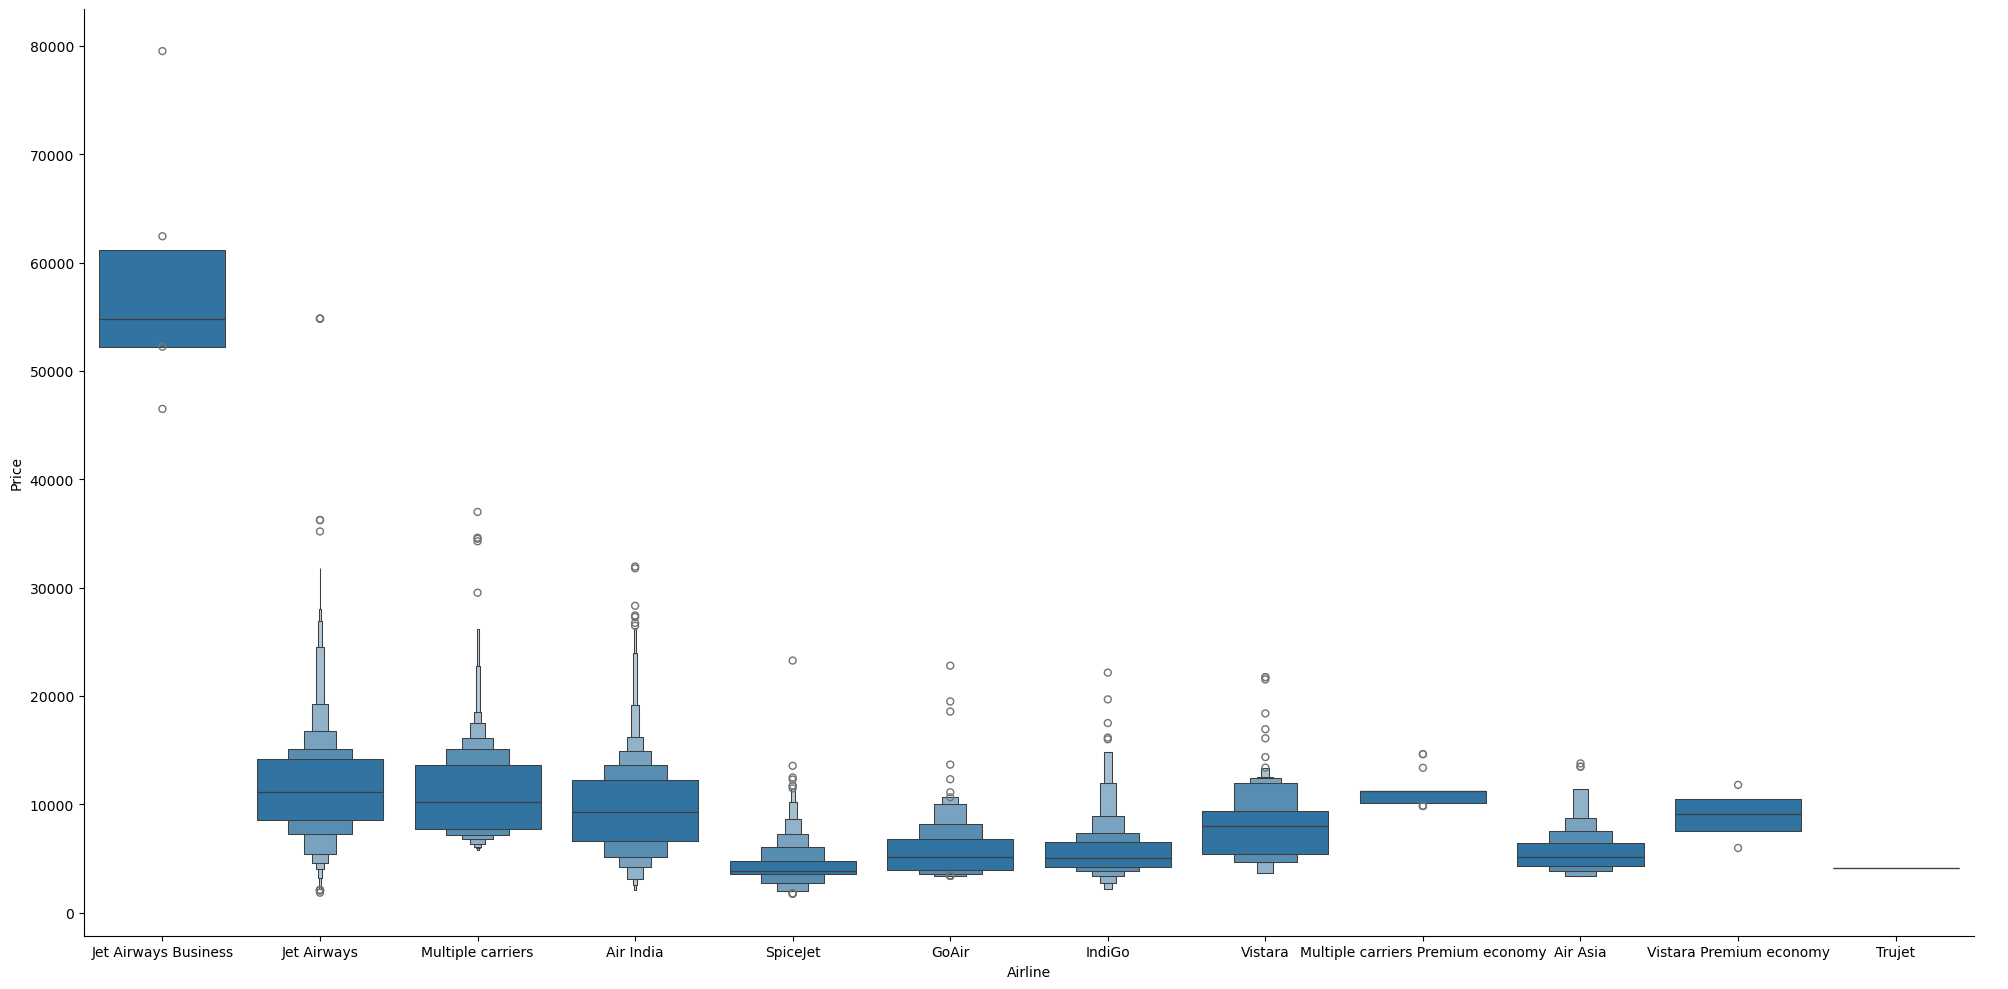

In [182]:
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=10,aspect=2)
plt.show()

In [183]:
# It could be noted that Jet Airways Business has highest Price and Highest Outliers

In [184]:
#plotting the catplot for Destination vs price

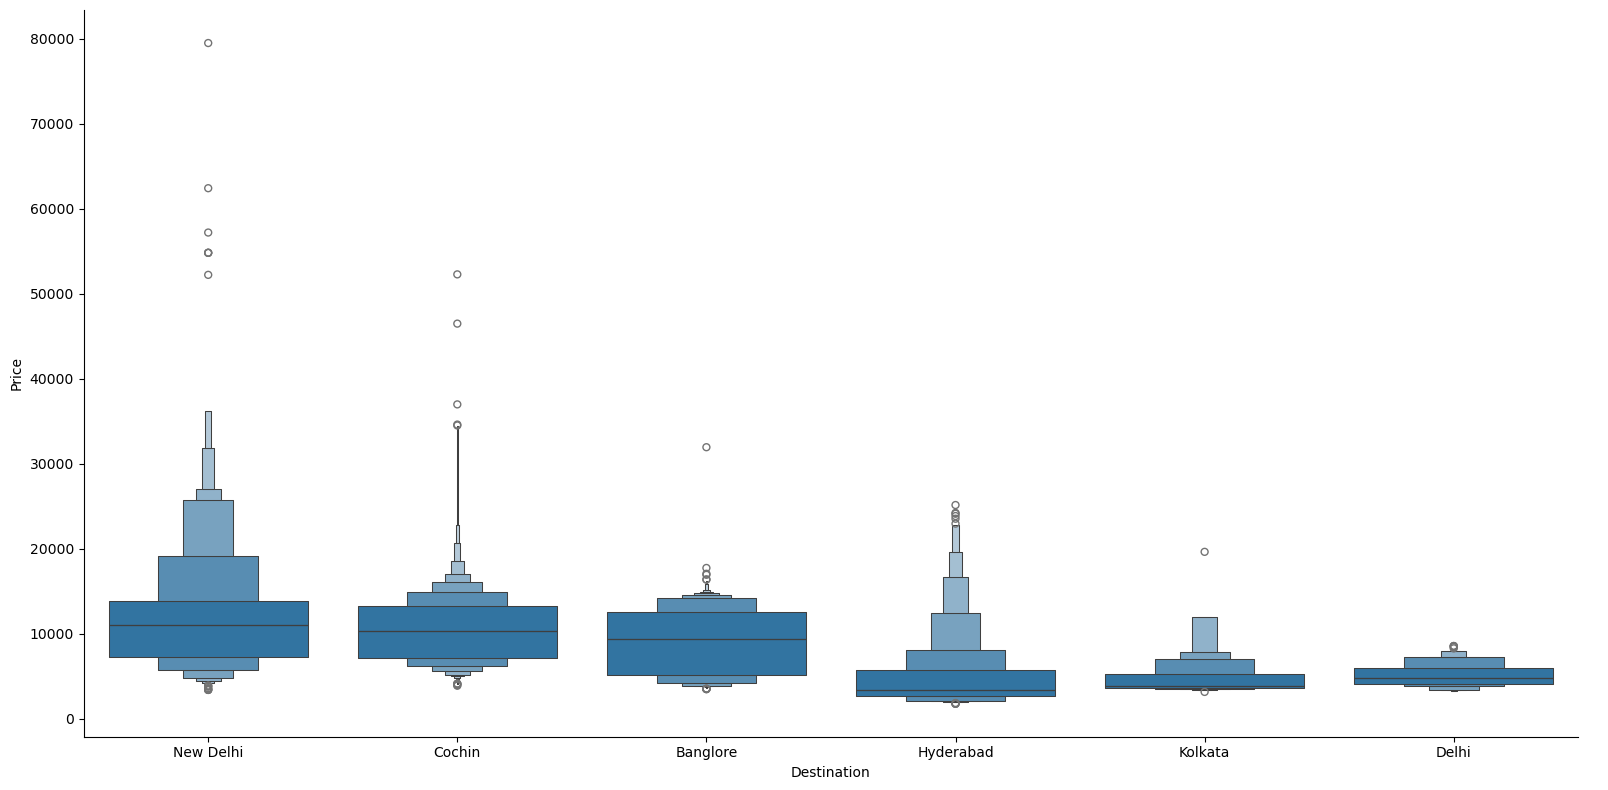

In [185]:
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=2)
plt.show()

In [186]:
# it could be noted that New Delhi has prices on higher side and higher outliers

# Feature Engineering:
it is required to perform feature engineering to extract meaning from existing columns

In [188]:
# Splitting date into date and Month

In [189]:
df['Journey_Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)

In [190]:
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)

In [191]:
# Dropping the original 'Date_of_Journey' column

In [192]:
df.drop(labels='Date_of_Journey',axis=1,inplace=True)

In [193]:
df['Month'].value_counts()

Month
5    3395
6    3311
3    2678
4    1078
Name: count, dtype: int64

In [194]:
df['Month'].unique()

array([3, 5, 6, 4])

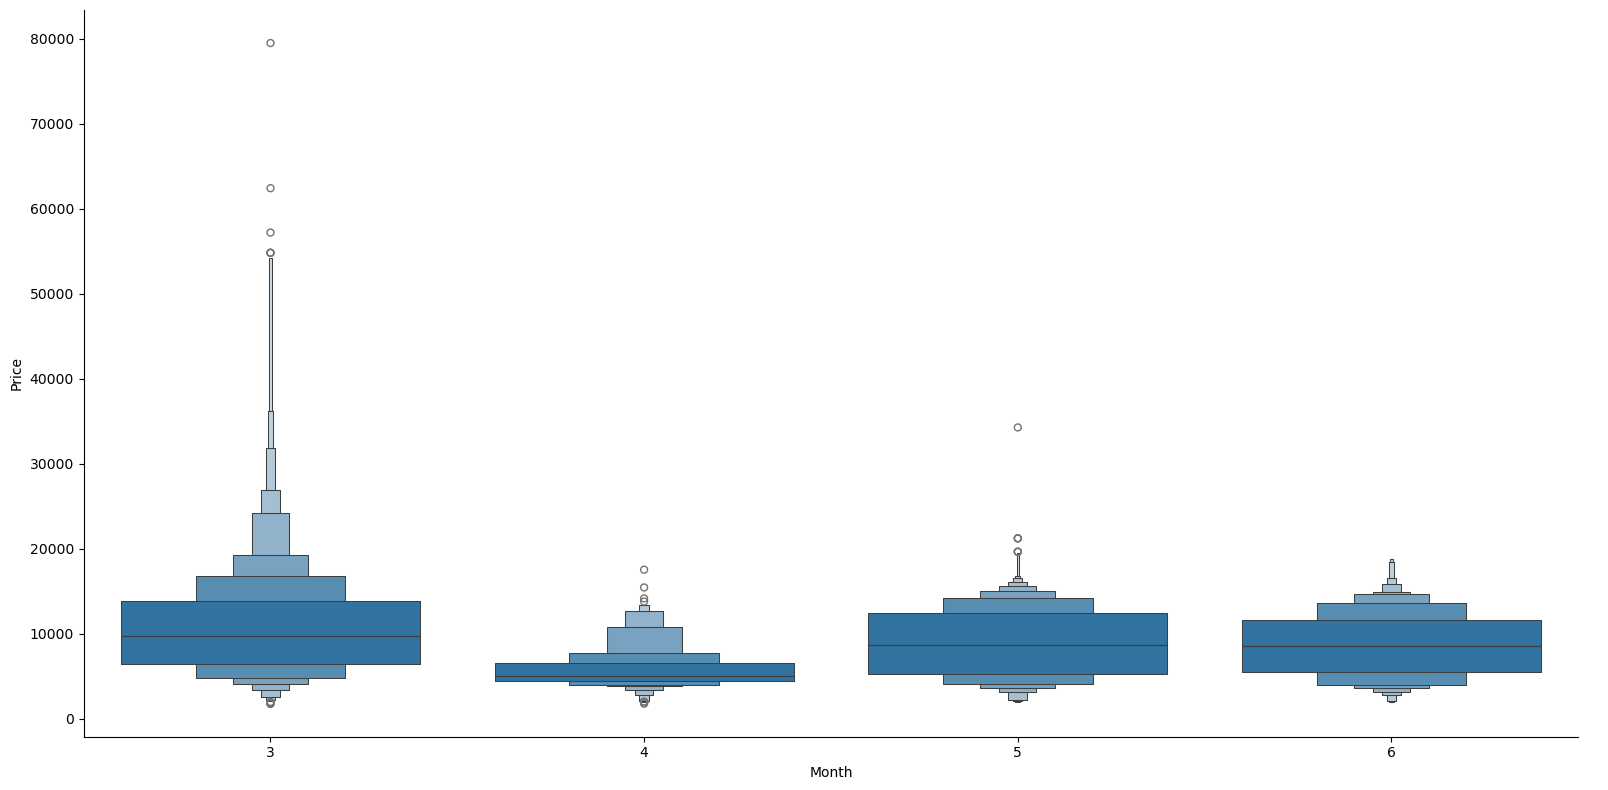

In [195]:
# Plotting the prices monthwise
sns.catplot(x='Month',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=2)
plt.show()

In [196]:
# It could be noted that March has prices on higher side with Higher outliers

In [197]:
# Converting the Duration into minutes:
df['Duration_min']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [198]:
df['Duration_min']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_min, Length: 10462, dtype: int64

In [199]:
#droppring the original Duration column
df.drop(labels='Duration',axis=1,inplace=True)

In [237]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date', 'Month',
       'Duration_min'],
      dtype='object')

In [239]:
# Similary converting the Arrival and departure time into Hours and minutes

In [253]:
df['Arr_hr']=pd.to_datetime(df.Arrival_Time).dt.hour
df['Arr_min']=pd.to_datetime(df.Arrival_Time).dt.minute

In [257]:
# Dropping the original Arrival_Time column

In [261]:
df.drop(labels='Arrival_Time',axis=1,inplace=True)

In [263]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Date', 'Month', 'Duration_min',
       'Arr_hr', 'Arr_min'],
      dtype='object')

In [265]:
df['Dep_hr']=pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min']=pd.to_datetime(df.Dep_Time).dt.minute

In [267]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Date', 'Month', 'Duration_min',
       'Arr_hr', 'Arr_min', 'Dep_hr', 'Dep_min'],
      dtype='object')

In [269]:
# Dropping the original Dep_Time column

In [271]:
df.drop(labels='Dep_Time',axis=1,inplace=True)

In [273]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Date', 'Month', 'Duration_min',
       'Arr_hr', 'Arr_min', 'Dep_hr', 'Dep_min'],
      dtype='object')

In [275]:
# extracting list of numerical columns
df_numerical=df.select_dtypes(include=['int32','float','int64'])

In [277]:
df_numerical

,Price,Journey_Date,Month,Duration_min,Arr_hr,Arr_min,Dep_hr,Dep_min
0,3897,24,3,170,1,10,22,20
1,7662,1,5,445,13,15,5,50
2,13882,9,6,1140,4,25,9,25
3,6218,12,5,325,23,30,18,5
4,13302,1,3,285,21,35,16,50
...,...,...,...,...,...,...,...,...
10678,4107,9,4,150,22,25,19,55
10679,4145,27,4,155,23,20,20,45
10680,7229,27,4,180,11,20,8,20
10681,12648,1,3,160,14,10,11,30


In [279]:
# It could be noted that Month is actually a Categorical Column with Months as Category

In [285]:
df['Month'].replace({3:'March',4:'April',5:'May',6:'June'},inplace=True)

In [297]:
df['Month'].value_counts()

Month
May      3395
June     3311
March    2678
April    1078
Name: count, dtype: int64